In [1]:
#importin the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from matplotlib.cm import rainbow
import pickle

In [2]:
#importing the dataset
dataset = pd.read_csv('dataset.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


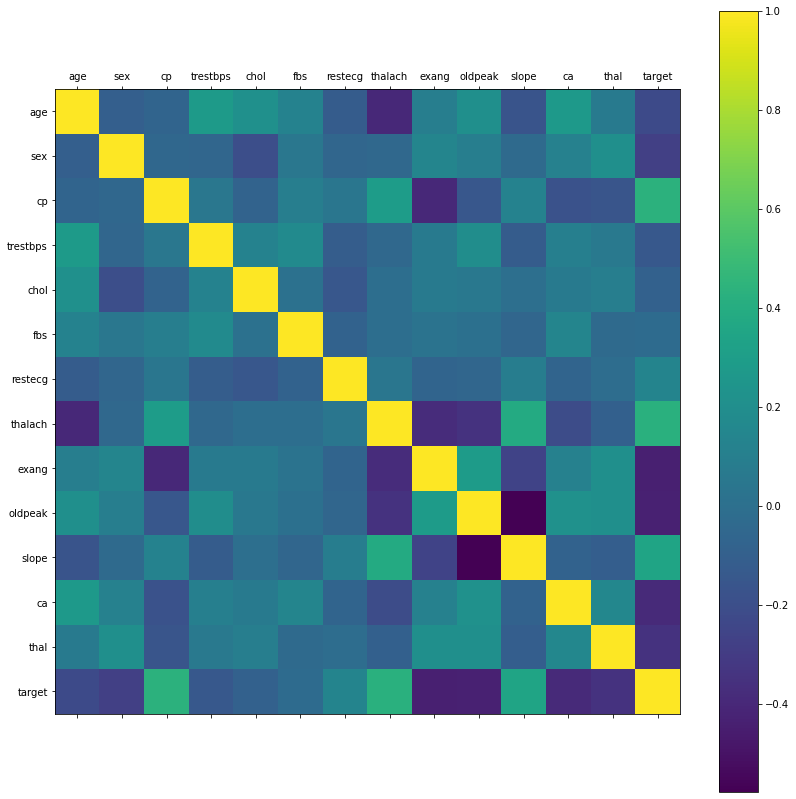

In [5]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

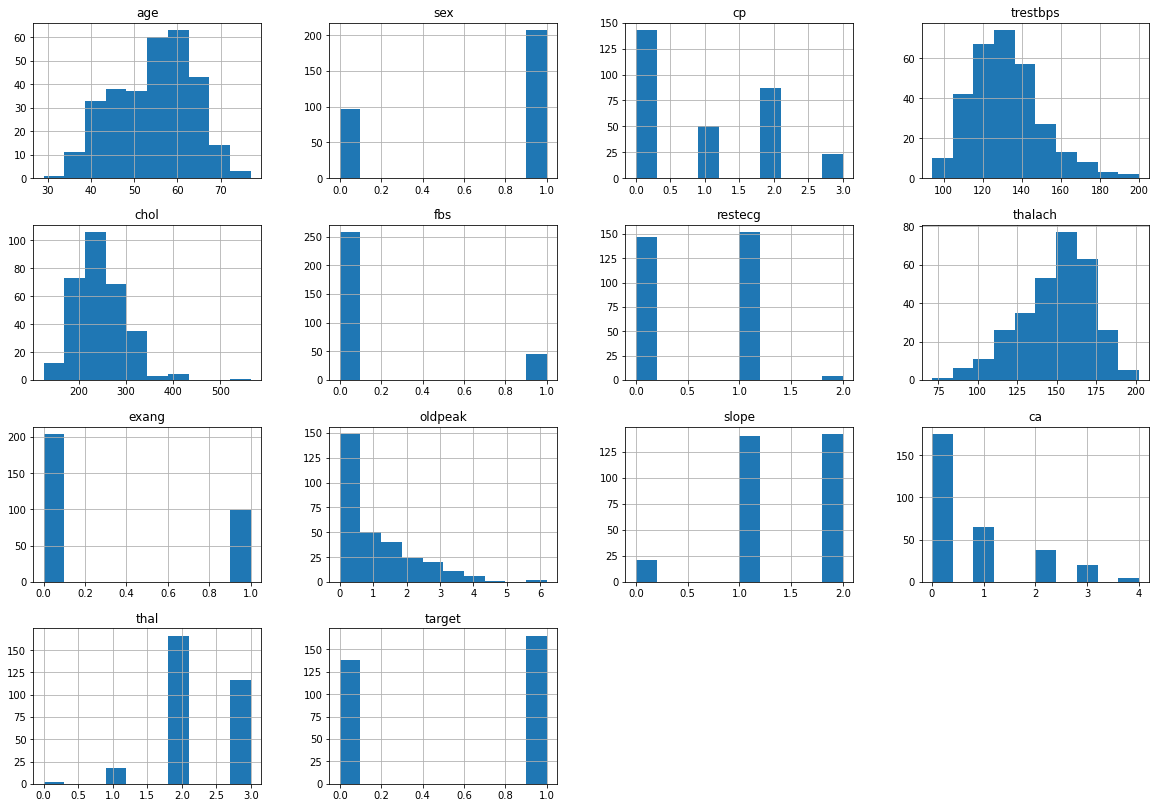

In [6]:
dataset.hist()

In [7]:
#Encoding categorical data
dummy=pd.get_dummies(dataset,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
dummy

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
#feature scaling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


In [9]:
#Extracting independent variable:
X=dataset.drop(columns=['target'])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3


In [10]:

#Extracting dependent variable:
y=dataset['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [11]:
#handling missing data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
imputer.fit(X.iloc[:, 1:13])
X.iloc[:, 1:13]=imputer.transform(X.iloc[:, 1:13])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1.0,3.0,0.763956,-0.256334,1.0,0.0,0.015443,0.0,1.087338,0.0,0.0,1.0
1,-1.915313,1.0,2.0,-0.092738,0.072199,0.0,1.0,1.633471,0.0,2.122573,0.0,0.0,2.0
2,-1.474158,0.0,1.0,-0.092738,-0.816773,0.0,0.0,0.977514,0.0,0.310912,2.0,0.0,2.0
3,0.180175,1.0,1.0,-0.663867,-0.198357,0.0,1.0,1.239897,0.0,-0.206705,2.0,0.0,2.0
4,0.290464,0.0,0.0,-0.663867,2.082050,0.0,1.0,0.583939,1.0,-0.379244,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.0,0.0,0.478391,-0.101730,0.0,1.0,-1.165281,1.0,-0.724323,1.0,0.0,3.0
299,-1.033002,1.0,3.0,-1.234996,0.342756,0.0,1.0,-0.771706,0.0,0.138373,1.0,0.0,3.0
300,1.503641,1.0,0.0,0.706843,-1.029353,1.0,1.0,-0.378132,0.0,2.036303,1.0,2.0,3.0
301,0.290464,1.0,0.0,-0.092738,-2.227533,0.0,1.0,-1.515125,1.0,0.138373,1.0,1.0,3.0


In [12]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# X_train

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
# from sklearn.ensemble import RandomForestClassifier
# rf_classifier = RandomForestClassifier(criterion = 'entropy')
# rf_classifier.fit(X_train,y_train)


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(criterion = 'entropy', n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

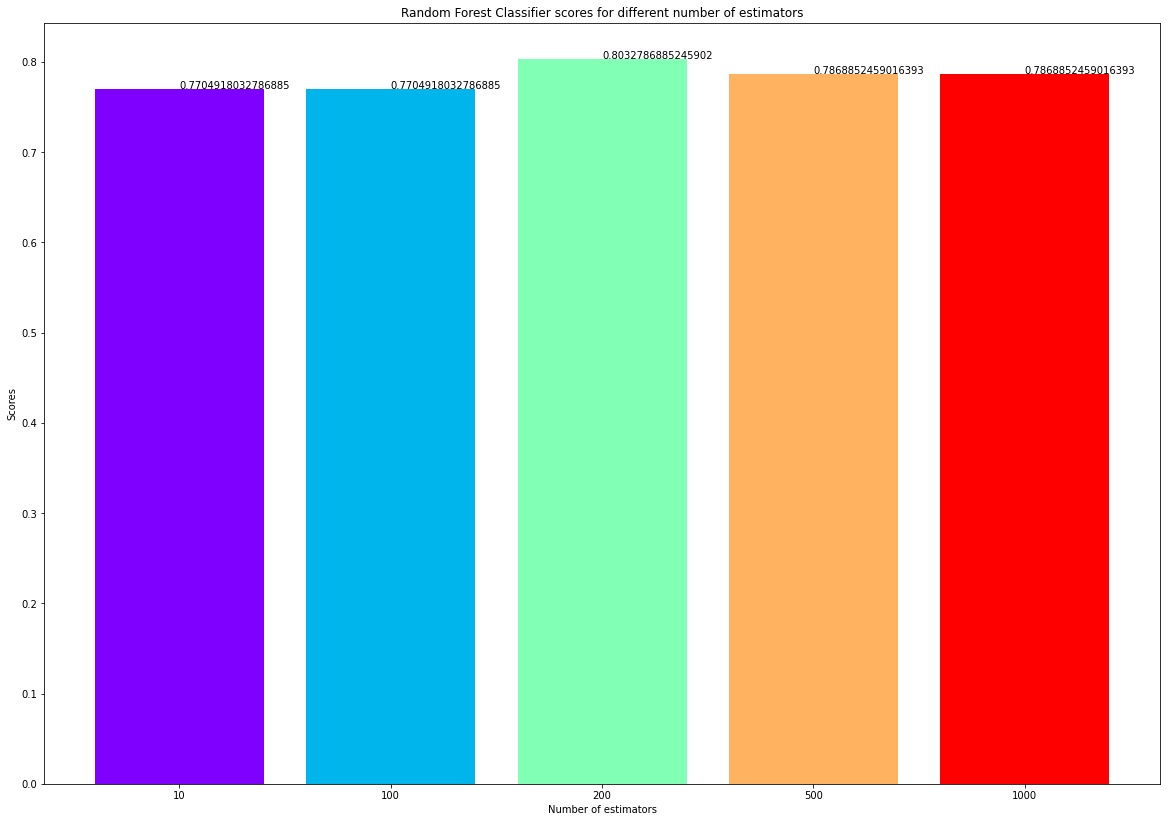

In [16]:

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [17]:
y_pred = rf_classifier.predict(X_test)

# from sklearn.metrics import accuracy_score
# score=accuracy_score(y_test,y_pred)*100
# score

In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  0.7419354838709677


In [19]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ",recall)

recall:  0.8214285714285714


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.74      0.82      0.78        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



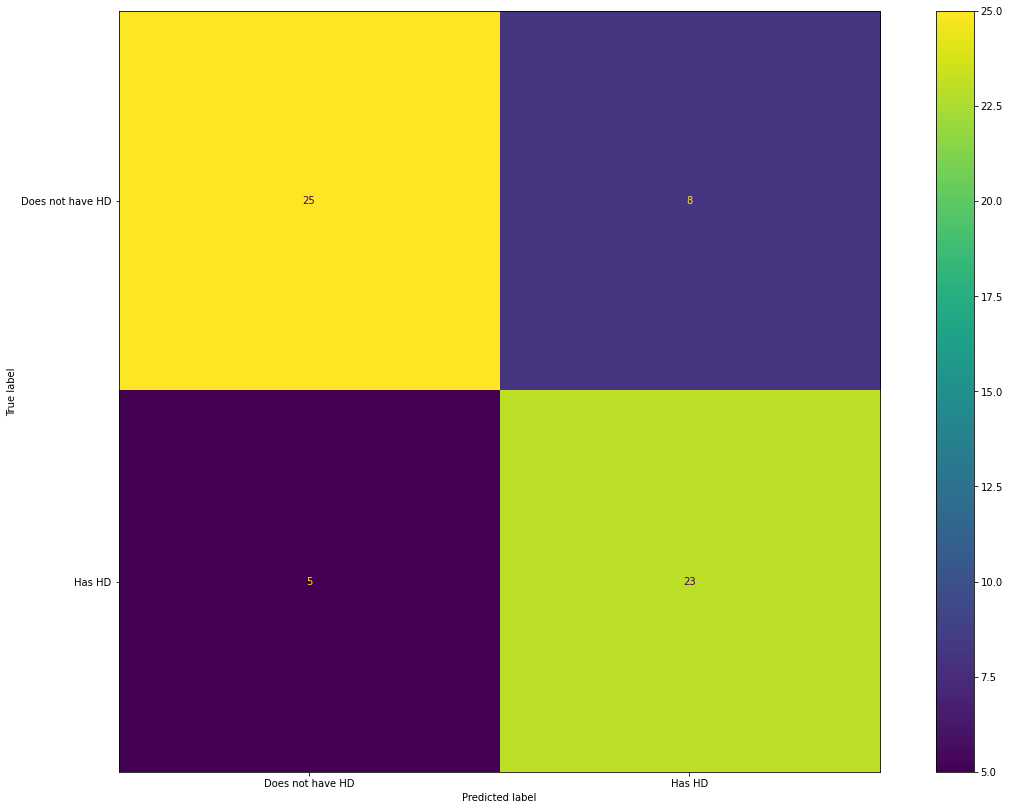

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier,X_test,y_test,display_labels=['Does not have HD','Has HD'])

In [22]:
pickle.dump(rf_classifier,open('HD_RF.pkl','wb'))